# Predicting Parkinson's disease using phonetic features extracted from voice recordings of patient and control subjects



Parkinson's disease (PD) is a progressive, incurable neurodegenerative disorder of the central nervous system that causes partial or full loss in motor reflexes, speech, behavior, mental processing, and other important functions. After Alzheimer's disease, PD is the second most common neurodegenerative disease. In general, PD occurs in one out of every hundred people over 65 years of age. Currently, there are only symptomatic treatments available and monitoring of disease progression requires special testing. The three data sets I will analyse in my Capstone Project were produced in order to determine if PD-associate speech impairments can be used to telediagnose PD or to telemonitor PD progression. PD is associated with speech impairments like dysphonia (defective use of voice), hypophonia (reduced volume), monotone (reduced pitch range), and dysarthia (difficulty with articulation of sounds).  

For my first milestone of my Capstone Project, I selected the dataset provided by Betul Erdogdu Sakar et al. 2013 in the UCI Machine Learning Repository. The data set consists of 26 voice samples for each of the 20 PD patients and 20 healthy individuals selected for this study. In addition, there is an independent validation data set available from 28 additional PD patients with 6 sound recordings each. From each voice sample 26 different time-frequency-based features were extracted and will be used for the prediction. The main data set also includes the Unified Parkinson's Disease Rating Scale (UPDRS) as a measure of PD progression for each subject. In their original analysis Sakar et al. compared different cross-validation techniques in classification algorithms built for PD diagnosis. They used k-nearest neighbour and support vector machines as classification algorithms and evaluated the success of the models discriminating healthy subjects from PD patients according to accuracy, specificity, sensitivity, and Matthews correlation coefficient scores. 

In detail, Sakar et al. compared classification with Leave-One-Subject-Out (leaving out all 26 voice recordings of one subject for model building) to classification with Summarized Leave-One-Out (feature values of each subject were summarized using central tendency and dispersion metrics like mean and standard deviation). For the latter, the different metrics were used for model building in groups of two or six using the leave-one-out cross-validation technique. They found that representing samples of a subject with mean and standard deviation improves generalization of the predictive model. 

The main aim of my analysis will be to identify features from the voice recordings that best differentiates Parkinson’s disease patients from healthy individuals. For this I will apply different feature selection techniques. In addition, I will apply other classification algorithms to identify the best generalizable model differentiating PD patients and healthy control subjects.

Clients for my study could be the Parkinson's Voice Initiative (http://www.parkinsonsvoice.org/index.php) and potentially Intel and other companies producing automatic telemonitoring devices, as those companies may become interested to introduce their devices as general option to diagnose and monitor progression of Parkinson’s disease in the patients’ home.

For my milestone, I will explore the dataset by different visualization techniques to learn more about the features used in the analysis. In addition, I will persue some of the classification algorithms described by Sakar et al. 2013 in order to set the stage for my own analysis, which will culminate in a paper describing results and recommendations for my clients and be the finalization of my Capstone Project for the Springboard Data Science Intensive course.


In [1]:
# Load dataset (CSV file) into a Pandas dataframe
import pandas as pd
pd_s1 = pd.read_csv("train_data1.csv",header=False) 

In [2]:
pd_s1.head()

,sample,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d19,d20,d21,d22,d23,d24,d25,d26,udprs,group
0,1_1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1_2,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1_3,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1_4,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1_5,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


Overview on the time-frequency-based features extracted from the collected voice samples:
Features d1-d5 are frequency parameters based on Jitter, i.e. frequency of voice amplitudes.
Features d6-d11 are amplitude (shimmer) based parameters.
Features d12-d14 are harmonicity parameters and include autocorrelation, noise-to-harmonic and harmonic-to-noise.
Features d15-d19 are parameters describing different elements of pitch.
Features d20-d23 are pulse parameters, while features d24-d26 are voice parameters. 

d1	Jitter (local)  
d2	Jitter (local, absolute)  
d3	Jitter (RAP)  
d4	Jitter (PPQ5)  
d5	Jitter (DDP)  
d6	Shimmer (local)  
d7	Shimmer (local, dB)  
d8	Shimmer (APQ3)  
d9	Shimmer (APQ5)  
d10	Shimmer (APQ11)  
d11	Shimmer (DDA)  
d12	Autocorrelation (AC)  
d13	Noise-To-Harmonic (NTH)  
d14	Harmonic-To-Noise (HTN)  
d15	Median pitch  
d16	Mean pitch  
d17	Pitch standard deviation  
d18	Minimum pitch  
d19	Maximum pitch  
d20	Number of pulses  
d21	Number of periods  
d22	Mean period  
d23	Period standard deviation  
d24	Fraction of locally unvoiced frames  
d25	Number of voice breaks  
d26	Degree of voice breaks  

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Identify relationship between variables by calculating Spearman rank correlations between each feature
v_f = pd_s1.iloc[0:,1:27]
corr_df = v_f.corr(method="spearman")

HEATMAP


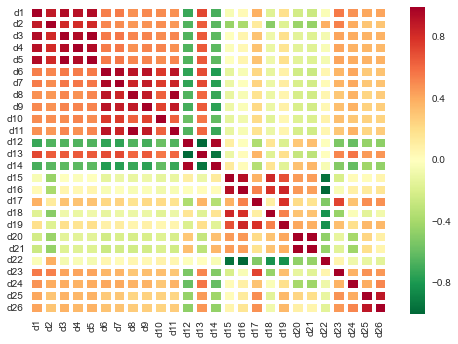

In [5]:
#Create heatmap of correlation values calculated for each pair of features
import seaborn
print("HEATMAP")
# Create the heatmap using seaborn library
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , linewidths=2.5)
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

It can be noted that a number of vocal measures are highly correlated with the others, because some measures indicated similar characteristics of the acoustic signals in the data set. The similar vocal measure groups are frequency parameters (d1-d5), amplitude parameters (d6-d11), pairs of pitch parameters (d12 and d14, d15 and d16), pitch parameters d20 and d21, as well as voice characteristics d25 and d26. Interestingly, certain feature pairs show strong anti-correlation such as d12 and d13, d13 and d14 as well as d15 and d22 and d16 and d22. Sakar et al. did not perform any feature selection. Therefore, I will apply feature selection techniques to identify the dominant features and exclude measures that contribute redundant information. Using less features may improve performance of the classifier and may reduce problems with overfitting.

Many of the features are characterized by different scales. Therefore, all the feature values were normalized, such that each feature has a zero mean and standard deviation of one. 

In [6]:
pd1 = pd_s1.iloc[:,1:]
pd1_norm = (pd1 - pd1.mean())/pd1.std()
pd1_norm.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d19,d20,d21,d22,d23,d24,d25,d26,udprs,group
0,-0.675064,-0.753234,-0.354330,-0.486789,-0.354665,-0.840833,-0.990060,-0.392215,-0.697093,-0.899786,...,-0.389168,0.334977,0.354918,-0.256961,-0.589505,-1.319784,-0.702651,-0.815863,0.629139,0.999519
1,-1.105646,-1.246545,-0.912800,-0.853861,-0.912783,-1.293860,-1.316195,-1.207754,-0.992287,-0.834629,...,-0.003052,0.401631,0.421844,-0.728068,-0.607183,-1.212658,-0.702651,-0.815863,0.629139,0.999519
2,-0.826900,-0.905149,-0.525853,-0.595681,-0.525844,-0.770219,-0.761527,-0.448596,-0.582032,-0.775788,...,-0.192807,8.806745,8.841230,-0.253749,-0.509274,-0.811758,-0.083365,-0.804123,0.629139,0.999519
3,-0.100576,-0.446896,-0.092962,0.250867,-0.092621,0.109059,0.185932,-0.144801,0.162666,0.758553,...,-0.120502,-0.104942,-0.093492,-0.872702,-0.722939,-1.319784,-0.702651,-0.815863,0.629139,0.999519
4,0.469945,-0.032605,0.477759,0.167442,0.477749,-0.698138,-0.368736,-0.861507,-0.631403,0.101002,...,-0.079923,0.048363,0.053747,-0.954174,-0.639680,-0.452955,-0.083365,0.062522,0.629139,0.999519


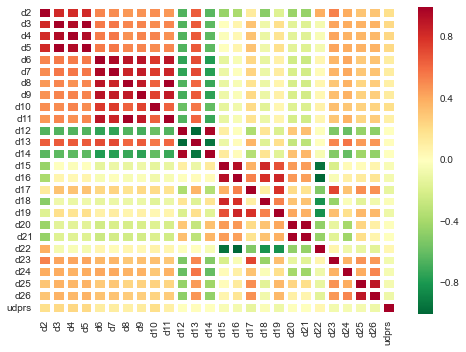

In [12]:
#Identify relationship between variables by calculating Spearman rank correlations between each feature
v_f = pd1_norm.iloc[0:,1:27]
corr_df = v_f.corr(method="spearman")
# Create the heatmap using seaborn library
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , linewidths=2.5)
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

Using unbiased dimensionality reduction approaches such as PCA, I tried to determine if using just three features, will give good descrimination of voice sample of PD patients and healthy controls. However, there is no clear separation between the two groups. 

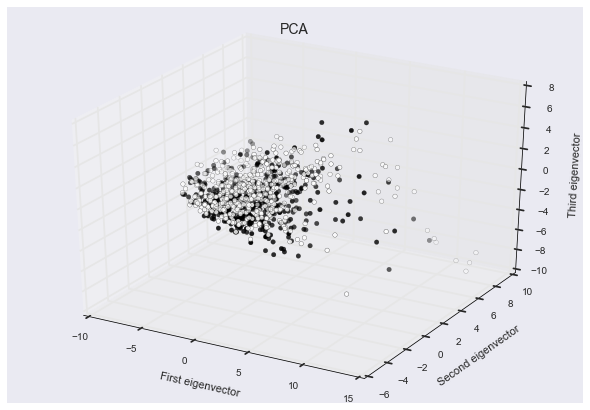

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
pd1_n_data = pd1_norm.iloc[:,:26]
x_red = PCA(n_components=3).fit_transform(pd1_n_data)
pd = pd1.group == 1
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('PCA',size=14)
ax.scatter(x_red[:,0],x_red[:,1],x_red[:,2],c=pd)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')

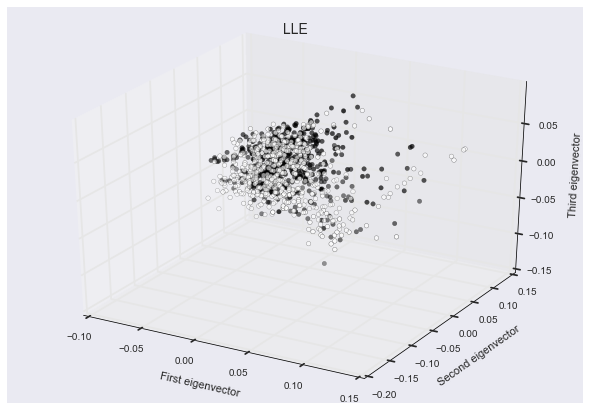

In [14]:
from sklearn import manifold
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                      method='standard')
X_lle = clf.fit_transform(pd1_n_data)
pd = pd1.group == 1
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('LLE',size=14)
ax.scatter(X_lle[:,0],X_lle[:,1],X_lle[:,2],c=pd)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')

The difficulty in separating the two groups may be the underlying variations between different voice samples of a subject. The variations could originate from the fact that not all the voice samples of a PD patient show indications of speech impairment. To decrease the effect of this variations Sakar et al. summarized feature values of the 26 voice samples of each subject using central tendency and dispersion metrics such as mean, median, trimmed mean, standard deviation, interquartile range, and mean absolute deviation. 

I exported the feature table to excel and summarized the 26 voice samples of each subject according to the described metrics. Next I imported the resulting table back into this notebook.

In [15]:
import pandas as pd
pd_sf = pd.read_csv("PD1_sumFeatures.csv",header=False)
pd_sf.head()

,sample,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d18,d19,d20,d21,d22,d23,d24,d25,d26,group
0,1_1,-0.203995,-0.524940,-0.141694,-0.075201,-0.141692,-0.434702,-0.303912,-0.500768,-0.344154,...,0.611605,-0.067034,0.411629,0.424419,-0.813985,-0.574418,-0.494137,-0.250096,-0.365661,1
1,2_1,-0.274792,-0.587957,-0.196590,-0.082834,-0.196588,-0.525639,-0.380639,-0.510118,-0.458914,...,0.723572,-0.039336,-0.061617,-0.049989,-0.871653,-0.611231,-0.561296,-0.393008,-0.809993,1
2,3_1,-0.266605,-0.567582,-0.175456,-0.118049,-0.175454,-0.448936,-0.302081,-0.528210,-0.389082,...,0.674655,-0.072676,0.039698,0.052074,-0.842487,-0.580278,-0.534205,-0.362044,-0.499415,1
3,4_1,0.572402,0.424184,0.463871,0.522391,0.463874,0.490906,0.554996,0.432066,0.469324,...,0.491145,0.177804,1.750148,1.754059,0.215338,0.190838,0.642607,0.569142,0.633545,1
4,5_1,0.409244,0.303281,0.346247,0.373198,0.346241,0.400195,0.457517,0.330099,0.375250,...,0.371086,0.149569,0.767807,0.767123,0.167476,0.148125,0.516585,0.452555,0.518575,1


In [16]:
#get a table with all the feature data
pd1_sf_f = pd_sf.iloc[:,1:27]
print(pd1_sf_f.head())
#get an array with all the labels
pd1_sf_l = pd_sf.iloc[:,-1]
print(pd1_sf_l[0:5])
print(len(pd1_sf_l))

         d1        d2        d3        d4        d5        d6        d7  \
0 -0.203995 -0.524940 -0.141694 -0.075201 -0.141692 -0.434702 -0.303912   
1 -0.274792 -0.587957 -0.196590 -0.082834 -0.196588 -0.525639 -0.380639   
2 -0.266605 -0.567582 -0.175456 -0.118049 -0.175454 -0.448936 -0.302081   
3  0.572402  0.424184  0.463871  0.522391  0.463874  0.490906  0.554996   
4  0.409244  0.303281  0.346247  0.373198  0.346241  0.400195  0.457517   

         d8        d9       d10    ...          d17       d18       d19  \
0 -0.500768 -0.344154 -0.053042    ...    -0.337666  0.611605 -0.067034   
1 -0.510118 -0.458914 -0.127296    ...    -0.332077  0.723572 -0.039336   
2 -0.528210 -0.389082 -0.107682    ...    -0.346713  0.674655 -0.072676   
3  0.432066  0.469324  0.761485    ...     0.176098  0.491145  0.177804   
4  0.330099  0.375250  0.645334    ...     0.143939  0.371086  0.149569   

        d20       d21       d22       d23       d24       d25       d26  
0  0.411629  0.424419 -0

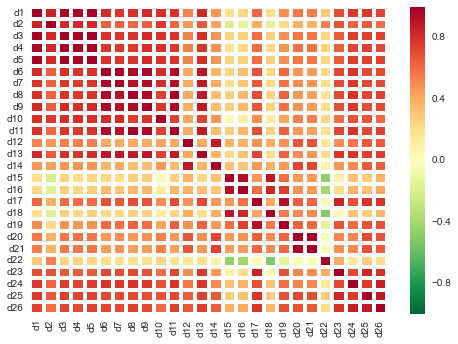

In [17]:
#Identify relationship between variables by calculating Spearman rank correlations between each feature
v_f = pd1_sf_f
corr_df = v_f.corr(method="spearman")
# Create the heatmap using seaborn library
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , linewidths=2.5)
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [18]:
#Get features and labels for the original normalized dataset including the 26 separate voice samples of each subject
pd1_features = pd1_norm.iloc[:,0:26]
pd1_features.head()
pd1_labels = pd_s1.iloc[:,-1]
print(pd1_labels[0:5])
print(len(pd1_labels))

0    1
1    1
2    1
3    1
4    1
Name: group, dtype: int64
1040


## k-Nearest neighbour classification

K-nearest neighbour classifier: Euclidean distance metric and k parameters of 1, 3, 5, and 7

I will use accuracy and Matthews Correlation Coefficient (MCC) as evaluation metrics of each classifier.

###Leave-one-subject-out (LOSO)

If the majority of the voice samples of a test individual are classified as PD, then the individual is classified as PD (1) and otherwise as healthy (0).

In [19]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score,matthews_corrcoef
import numpy as np
from scipy import interp

In [20]:
true_labels = [1]*20+[0]*20
print(true_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
## K-nearest neighbour with k=1
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
('Accuracy:', '55.00')
('MCC:', '0.1000')


In [22]:
## K-nearest neighbour with k=3
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = neighbors.KNeighborsClassifier(3, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
('Accuracy:', '52.50')
('MCC:', '0.0501')


In [23]:
true_labels = [1]*20+[0]*20
#print(true_labels)
## K-nearest neighbour with k=5
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = neighbors.KNeighborsClassifier(5, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
('Accuracy:', '60.00')
('MCC:', '0.2010')


In [24]:
## K-nearest neighbour with k=7
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]
('Accuracy:', '57.50')
('MCC:', '0.1549')


The highest accuracy of 60% and highest MCC of 0.201 is achieved with k=5, when using LOSO cross-validation.

###Summarized Leave-One-Out (s-LOO)

Summary Metrics:
1 - mean
2 - median
3 - trimmed mean (25% removed)
4 - standard deviation
5 - mean absolute deviation
6 - interquartile range

In [25]:
true_labels = [1]*120+[0]*120
## K-nearest neighbour with k=1; s-LOO all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [26]:
## K-nearest neighbour with k=3; s-LOO all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = neighbors.KNeighborsClassifier(3, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [27]:
## K-nearest neighbour with k=5; s-LOO all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = neighbors.KNeighborsClassifier(5, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [28]:
## K-nearest neighbour with k=7; s-LOO all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [29]:
pd1_train = pd1_sf_f[pd1_sf_f.index.isin([1])==False]
print(pd1_train.head())

         d1        d2        d3        d4        d5        d6        d7  \
0 -0.203995 -0.524940 -0.141694 -0.075201 -0.141692 -0.434702 -0.303912   
2 -0.266605 -0.567582 -0.175456 -0.118049 -0.175454 -0.448936 -0.302081   
3  0.572402  0.424184  0.463871  0.522391  0.463874  0.490906  0.554996   
4  0.409244  0.303281  0.346247  0.373198  0.346241  0.400195  0.457517   
5  0.555366  0.370716  0.511250  0.554120  0.511155  0.653314  0.897468   

         d8        d9       d10    ...          d17       d18       d19  \
0 -0.500768 -0.344154 -0.053042    ...    -0.337666  0.611605 -0.067034   
2 -0.528210 -0.389082 -0.107682    ...    -0.346713  0.674655 -0.072676   
3  0.432066  0.469324  0.761485    ...     0.176098  0.491145  0.177804   
4  0.330099  0.375250  0.645334    ...     0.143939  0.371086  0.149569   
5  0.576002  0.579800  1.325740    ...     0.248448  0.598968  0.289083   

        d20       d21       d22       d23       d24       d25       d26  
0  0.411629  0.424419 -0

In [30]:
true_labels = [1]*40+[0]*40

r =[]
for i in range(0,40):
    s = i*6
    e = i*6+3
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]


In [31]:
# K-nearest neighbour with k=1; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
('Accuracy:', '46.25')
('MCC:', '-0.0762')


In [32]:
# K-nearest neighbour with k=3; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(3, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
('Accuracy:', '43.75')
('MCC:', '-0.1283')


In [33]:
# K-nearest neighbour with k=5; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(5, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]
('Accuracy:', '46.25')
('MCC:', '-0.0780')


In [34]:
# K-nearest neighbour with k=7; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
('Accuracy:', '47.50')
('MCC:', '-0.0510')


In [35]:
r =[]
for i in range(0,40):
    s = (i)*6+1
    e = (i)*6+4
    r.append(s)
    r.append(e)
print(r)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]


[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238]


In [36]:
# K-nearest neighbour with k=1; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
('Accuracy:', '52.50')
('MCC:', '0.0503')


In [37]:
# K-nearest neighbour with k=3; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(3, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]
('Accuracy:', '46.25')
('MCC:', '-0.0762')


In [38]:
# K-nearest neighbour with k=5; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(5, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
('Accuracy:', '43.75')
('MCC:', '-0.1270')


In [39]:
# K-nearest neighbour with k=7; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
('Accuracy:', '46.25')
('MCC:', '-0.0752')


In [40]:
r =[]
for i in range(0,40):
    s = i*6+2
    e = i*6+5
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]


In [41]:
# K-nearest neighbour with k=1; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
('Accuracy:', '52.50')
('MCC:', '0.0500')


In [42]:
# K-nearest neighbour with k=3; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(3, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
('Accuracy:', '53.75')
('MCC:', '0.0756')


In [43]:
# K-nearest neighbour with k=5; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(5, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
('Accuracy:', '43.75')
('MCC:', '-0.1250')


In [44]:
# K-nearest neighbour with k=7; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
('Accuracy:', '58.75')
('MCC:', '0.1751')


In contrast, to what Sakar et al. reported, I get the highest accuracy for s-LOO with all six metrics (64-83% with decreasing k). When using only two of the six metrics, I get the highest accuracy, when using metrics 3 and 6 (trimmed mean and interquartile range) at k=7 (58.75%). Sakar et al. reported that they get the highest accuracy when using metrics 1 and 4 (mean and standard deviation). I assume this difference is due to me using the normalized data when determining the summery metrics. I will test this in another set of classifications.

## Support Vector Machine

Linear vs. RBF kernel

In [45]:
from sklearn.svm import SVC

### Leave-One-Subject-Out (LOSO)

In [46]:
true_labels = [1]*20+[0]*20
print(true_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [47]:
## SVM with linear kernel
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
('Accuracy:', '50.00')
('MCC:', '-0.0000')


In [48]:
## SVM with RBF kernel
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_features[pd1_features.index.isin(r)]
    pd1_train = pd1_features[pd1_features.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_features.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_features.index.isin(r)==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
('Accuracy:', '57.50')
('MCC:', '0.1502')


###summarized Leave-One-Out (s-LOO)

Summary Metrics:
1 - mean
2 - median
3 - trimmed mean (25% removed)
4 - standard deviation
5 - mean absolute deviation
6 - interquartile range

In [49]:
true_labels = [1]*120+[0]*120
## SVM with linear kernel, all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [50]:
true_labels = [1]*120+[0]*120
## SVM with RBF kernel, all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_f[pd1_sf_f.index.isin([i])]
    pd1_train = pd1_sf_f[pd1_sf_f.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_f.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_f.index.isin([i])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [51]:
true_labels = [1]*40+[0]*40

r =[]
for i in range(0,40):
    s = i*6
    e = i*6+3
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]

In [52]:
# SVM with linear kernel; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '60.00')
('MCC:', '0.2010')


In [53]:
# SVM with RBF kernel; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
('Accuracy:', '46.25')
('MCC:', '-0.0752')


In [54]:
r =[]
for i in range(0,40):
    s = i*6+1
    e = i*6+4
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]

In [55]:
# SVM with linear kernel; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
('Accuracy:', '55.00')
('MCC:', '0.1001')


In [56]:
# SVM with RBF kernel; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
('Accuracy:', '41.25')
('MCC:', '-0.1850')


In [57]:
r =[]
for i in range(0,40):
    s = i*6+2
    e = i*6+5
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_f[pd1_sf_f.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_f.index.isin(r)]

In [58]:
# SVM with linear kernel; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '67.50')
('MCC:', '0.3500')


In [59]:
# SVM with RBF kernel; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
('Accuracy:', '55.00')
('MCC:', '0.1005')


Similar to what Sakar et al. reported the SVM with linear kernel produced better classification than SVM with RBF kernel. In addition, s-LOO worked better than LOSO. However, again I found that using all summary metrics gives the highest accuracy and MCC value, followed by using trimmed mean and interquartile range and then mean and standard deviation.

In [60]:
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold

In [61]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(pd1_labels, 2),
              scoring='accuracy')
rfecv.fit(pd1_features, pd1_labels)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 10


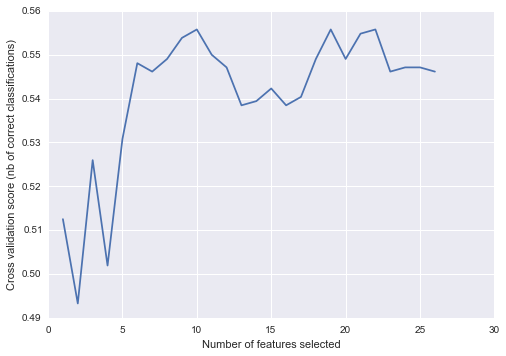

In [62]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [63]:
print(rfecv.ranking_)

[16  1 15  3  9  1  1 12 17  1  5  1  1 14  2  7 11  6  1 10  1  1  8  1 13
  4]


In [64]:
# Create the RFE object and compute a cross-validated score.
svc1 = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv1 = RFECV(estimator=svc1, step=1, cv=StratifiedKFold(pd1_sf_l, 2),
              scoring='accuracy')
rfecv1.fit(pd1_sf_f, pd1_sf_l)

print("Optimal number of features : %d" % rfecv1.n_features_)


Optimal number of features : 5


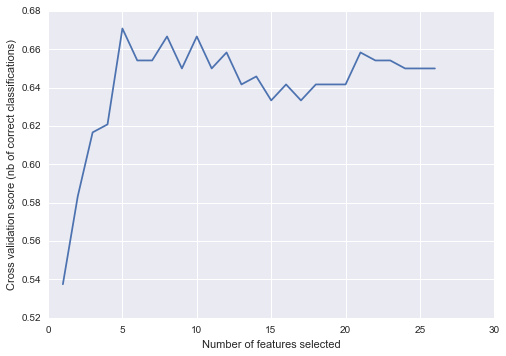

In [65]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_)
plt.show()


In [66]:
print(rfecv1.ranking_)

[14  1 20 22 18  1 16 19 11  8 21  2 17  9 12 15  5 10  6 13  1  4  7  3  1
  1]


In [67]:
test1 = rfecv.ranking_ == 1
print(test1)

[False  True False False False  True  True False False  True False  True
  True False False False False False  True False  True  True False  True
 False False]


In [68]:
test2 = rfecv1.ranking_ == 1
print(test2)

[False  True False False False  True False False False False False False
 False False False False False False False False  True False False False
  True  True]


In [69]:
pd1_feat1 = pd1_features.iloc[:,test1]

In [70]:
pd1_feat1.head()

,d2,d6,d7,d10,d12,d13,d19,d21,d22,d24
0,-0.753234,-0.840833,-0.990060,-0.899786,0.698779,-0.742070,-0.389168,0.354918,-0.256961,-1.319784
1,-1.246545,-1.293860,-1.316195,-0.834629,1.228245,-1.088163,-0.003052,0.421844,-0.728068,-1.212658
2,-0.905149,-0.770219,-0.761527,-0.775788,0.764151,-0.802440,-0.192807,8.841230,-0.253749,-0.811758
3,-0.446896,0.109059,0.185932,0.758553,0.645074,-0.723125,-0.120502,-0.093492,-0.872702,-1.319784
4,-0.032605,-0.698138,-0.368736,0.101002,0.127100,0.036041,-0.079923,0.053747,-0.954174,-0.452955


In [71]:
true_labels = [1]*20+[0]*20
#print(true_labels)
## K-nearest neighbour with k=5
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_feat1[pd1_feat1.index.isin(r)]
    pd1_train = pd1_feat1[pd1_feat1.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_feat1.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_feat1.index.isin(r)==False]
    clf = neighbors.KNeighborsClassifier(7, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
('Accuracy:', '52.50')
('MCC:', '0.0506')


In [72]:
pd1_sf_fea = pd1_sf_f.iloc[:,test2]
pd1_sf_fea.head()

,d2,d6,d21,d25,d26
0,-0.524940,-0.434702,0.424419,-0.250096,-0.365661
1,-0.587957,-0.525639,-0.049989,-0.393008,-0.809993
2,-0.567582,-0.448936,0.052074,-0.362044,-0.499415
3,0.424184,0.490906,1.754059,0.569142,0.633545
4,0.303281,0.400195,0.767123,0.452555,0.518575


In [73]:
true_labels = [1]*120+[0]*120
## K-nearest neighbour with k=1; s-LOO all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_fea[pd1_sf_fea.index.isin([i])]
    pd1_train = pd1_sf_fea[pd1_sf_fea.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_fea.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_fea.index.isin([i])==False]
    clf = neighbors.KNeighborsClassifier(1, weights='uniform')
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [74]:
true_labels = [1]*20+[0]*20
## SVM with linear kernel
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_feat1[pd1_feat1.index.isin(r)]
    pd1_train = pd1_feat1[pd1_feat1.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_feat1.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_feat1.index.isin(r)==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
('Accuracy:', '52.50')
('MCC:', '0.0506')


In [75]:
pred_labels = []
for i in range(0,40):
    s = i*26
    e = i*26+26
    r = range(s,e)
    pd1_test = pd1_feat1[pd1_feat1.index.isin(r)]
    pd1_train = pd1_feat1[pd1_feat1.index.isin(r)==False]
    pd1_test_l = pd1_labels[pd1_feat1.index.isin(r)]
    pd1_train_l = pd1_labels[pd1_feat1.index.isin(r)==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    if(sum(pred)>13):
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
('Accuracy:', '57.50')
('MCC:', '0.1517')


In [76]:
true_labels = [1]*120+[0]*120
## SVM with linear kernel, all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_fea[pd1_sf_fea.index.isin([i])]
    pd1_train = pd1_sf_fea[pd1_sf_fea.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_fea.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_fea.index.isin([i])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [77]:
true_labels = [1]*120+[0]*120
## SVM with RBF kernel, all summary metrics
pred_labels = []
for i in range(0,len(true_labels)):
    #s = i*6
    #e = i*6+6
    #r = range(s,e)
    pd1_test = pd1_sf_fea[pd1_sf_fea.index.isin([i])]
    pd1_train = pd1_sf_fea[pd1_sf_fea.index.isin([i])==False]
    pd1_test_l = pd1_sf_l[pd1_sf_fea.index.isin([i])]
    pd1_train_l = pd1_sf_l[pd1_sf_fea.index.isin([i])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [78]:
true_labels = [1]*40+[0]*40

r =[]
for i in range(0,40):
    s = i*6
    e = i*6+3
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_fea[pd1_sf_fea.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_fea.index.isin(r)]


In [79]:
# SVM with linear kernel; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '67.50')
('MCC:', '0.3540')


In [80]:
# SVM with RBF kernel; s-LOO summary metrics 1 and 4
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '65.00')
('MCC:', '0.3062')


In [81]:
true_labels = [1]*40+[0]*40

r =[]
for i in range(0,40):
    s = i*6+1
    e = i*6+4
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_fea[pd1_sf_fea.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_fea.index.isin(r)]

In [82]:
# SVM with linear kernel; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
('Accuracy:', '62.50')
('MCC:', '0.2503')


In [83]:
# SVM with RBF kernel; s-LOO summary metrics 2 and 5
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
('Accuracy:', '62.50')
('MCC:', '0.2529')


In [84]:
true_labels = [1]*40+[0]*40

r =[]
for i in range(0,40):
    s = i*6+2
    e = i*6+5
    r.append(s)
    r.append(e)
pd1_sf_f1 = pd1_sf_fea[pd1_sf_fea.index.isin(r)]
pd1_sf_l1 = pd1_sf_l[pd1_sf_fea.index.isin(r)]

In [85]:
# SVM with linear kernel; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="linear")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '67.50')
('MCC:', '0.3500')


In [86]:
# SVM with RBF kernel; s-LOO summary metrics 3 and 6
pred_labels = []
for j in range(0,len(r)):
    pd1_test = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train = pd1_sf_f1[pd1_sf_f1.index.isin([r[j]])==False]
    pd1_test_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])]
    pd1_train_l = pd1_sf_l1[pd1_sf_f1.index.isin([r[j]])==False]
    clf = SVC(kernel="rbf")
    clf.fit(pd1_train, pd1_train_l)
    pred = clf.predict(pd1_test)
    pred_labels.append(pred[0])
print(true_labels)
print(pred_labels)
print("Accuracy:",format(accuracy_score(true_labels,pred_labels)*100,'.2f'))
print("MCC:",format(matthews_corrcoef(true_labels,pred_labels),'.4f'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
('Accuracy:', '63.75')
('MCC:', '0.2751')


In [88]:
x_red = PCA(n_components=1).fit_transform(pd1_features)
pca = PCA(n_components=25)
pca.fit(pd1_features)
print(pca.explained_variance_ratio_)


[  4.05461002e-01   1.72225283e-01   9.69851422e-02   9.21399955e-02
   6.37897002e-02   4.39375830e-02   2.58782307e-02   2.26758939e-02
   1.79275540e-02   9.27217047e-03   8.39575224e-03   7.47730314e-03
   6.49988855e-03   5.56572286e-03   4.88985098e-03   4.31116792e-03
   3.91236721e-03   3.60450491e-03   2.60448199e-03   8.96008619e-04
   8.65386387e-04   5.19152416e-04   1.56167026e-04   9.68860500e-06
   1.42534333e-09]


In [95]:
pca = PCA(n_components=6)
pca.fit(pd1_features)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.405461    0.17222528  0.09698514  0.09214     0.0637897   0.04393758]
0.874538706516


In [99]:

pca = PCA(n_components=5)
pca.fit(pd1_sf_f)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.53679378  0.16227137  0.12123553  0.05972553  0.03414224]
0.914168440121


In [95]:
x_red1[:6,:2]

array([[-1.82705855, -0.57768635],
       [-3.07321238, -0.03761559],
       [-1.69380594, -0.43810573],
       [ 0.06274157,  0.63659039],
       [-1.38004988,  0.71642461],
       [-0.6511855 , -0.34687275]])